# outliers

# import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from data_io import load_oof
from data_io import load_train

%matplotlib inline

# outliers in y_train

In [2]:
train = load_train()

In [3]:
train.head()

,feature_1,feature_2,feature_3,target,first_active_month,card_id
0,5.0,2.0,1.0,-0.820283,2017-06,C_ID_92a2005557
1,4.0,1.0,0.0,0.392913,2017-01,C_ID_3d0044924f
2,2.0,2.0,0.0,0.688056,2016-08,C_ID_d639edf6cd
3,4.0,3.0,0.0,0.142495,2017-09,C_ID_186d6a6901
4,1.0,3.0,0.0,-0.159749,2017-11,C_ID_cdbd2c0db2


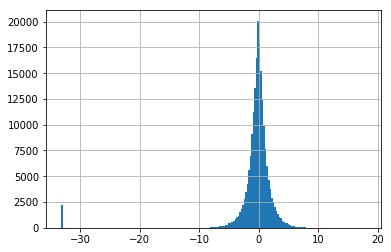

In [4]:
train.target.hist(bins=200)

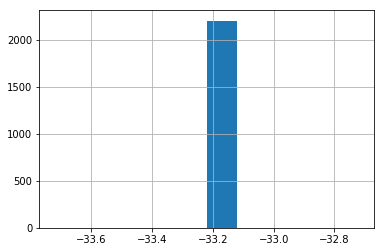

In [5]:
train[train.target < -20].target.hist()

In [6]:
train[train.target < -20].target.value_counts()

-33.21928    2207
Name: target, dtype: int64

# outliers in pred_test

In [7]:
import glob

In [8]:
glob.glob("./data/submissions/*")

['./data/submissions\\lgb000.csv',
 './data/submissions\\lgb000p.7z',
 './data/submissions\\lgb000p.csv',
 './data/submissions\\lgb001.7z',
 './data/submissions\\lgb001.csv',
 './data/submissions\\lgb001.rar',
 './data/submissions\\lgb001p.7z',
 './data/submissions\\lgb001p.csv',
 './data/submissions\\outlier002.csv']

In [9]:
pred000 = pd.read_csv("./data/submissions/lgb000.csv")
pred000.head()

,card_id,target
0,C_ID_0ab67a22ab,-2.653325
1,C_ID_130fd0cbdd,-0.460449
2,C_ID_b709037bc5,-0.690654
3,C_ID_d27d835a9f,-0.054941
4,C_ID_2b5e3df5c2,-0.988188


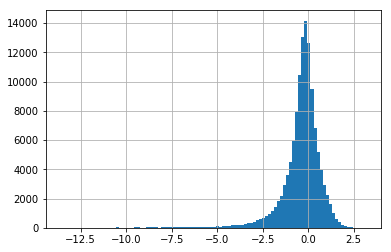

In [10]:
pred000.target.hist(bins=100)

In [11]:
pred001 = pd.read_csv("./data/submissions/lgb001.csv")
pred001.head()

,card_id,target
0,C_ID_0ab67a22ab,-2.600640
1,C_ID_130fd0cbdd,-0.465113
2,C_ID_b709037bc5,-1.000724
3,C_ID_d27d835a9f,-0.070215
4,C_ID_2b5e3df5c2,-0.971851


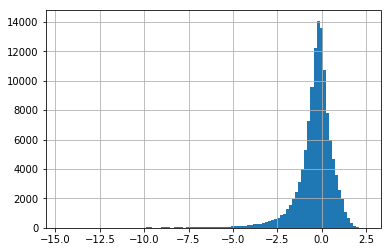

In [12]:
pred001.target.hist(bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B14D0B4BE0>]],
      dtype=object)

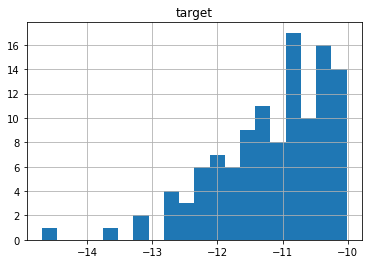

In [13]:
pred001[pred001.target < -10].hist(bins=20)

# post process

In [14]:
def post_process(data):
    data = data.copy()
    data.loc[data.target < -12, "target"] = -33.21928
    print((data.target == -33.21928).sum())
    return data

In [15]:
pred000p = post_process(pred000)
pred000p.to_csv("./data/submissions/lgb000p.csv", index=False)
pred001p = post_process(pred001)
pred001p.to_csv("./data/submissions/lgb001p.csv", index=False)

17
20


# mix prediction

In [30]:
import numpy as np
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

def calc_f1_score(precision, recall):
    return 2 * precision * recall / (precision + recall)


def calc_precision_recall_dataframe(target, pred, th_tail=1.0):
    precision, recall, thresholds = precision_recall_curve(target, pred)
    result = pd.DataFrame({
        "precision": precision,
        "recall": recall,
        "thresholds": np.append(thresholds, [th_tail])
    })
    result["f1_score"] = calc_f1_score(precision, recall)
    return result


def plot_f1(recall, precision, f1_score, average_precision):
    plt.figure(figsize=(18, 10))
    plt.plot(recall, precision, label="precision")
    plt.plot(recall, f1_score, label="f1_score", linestyle="--")
    plt.title("precision-recall curve: AP={0:0.2f}".format(average_precision))
    plt.xlabel('recall')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.legend()

In [40]:
lgb001_oof = load_oof("lgb001")

In [41]:
lgb001_oof.head()

,lgb001,target,card_id
0,-0.361844,-0.820283,C_ID_92a2005557
1,-0.529859,0.392913,C_ID_3d0044924f
2,0.584098,0.688056,C_ID_d639edf6cd
3,0.354337,0.142495,C_ID_186d6a6901
4,-0.140202,-0.159749,C_ID_cdbd2c0db2


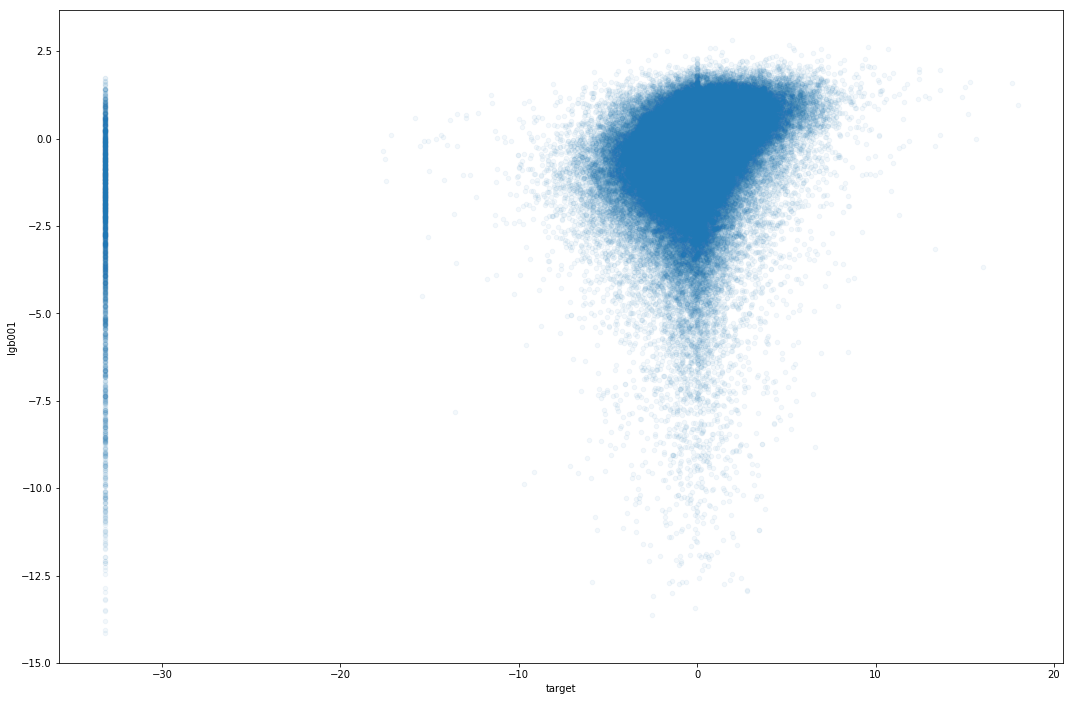

In [45]:
lgb001_oof.plot(kind="scatter", x="target", y="lgb001", figsize=(18, 12), alpha=.05)

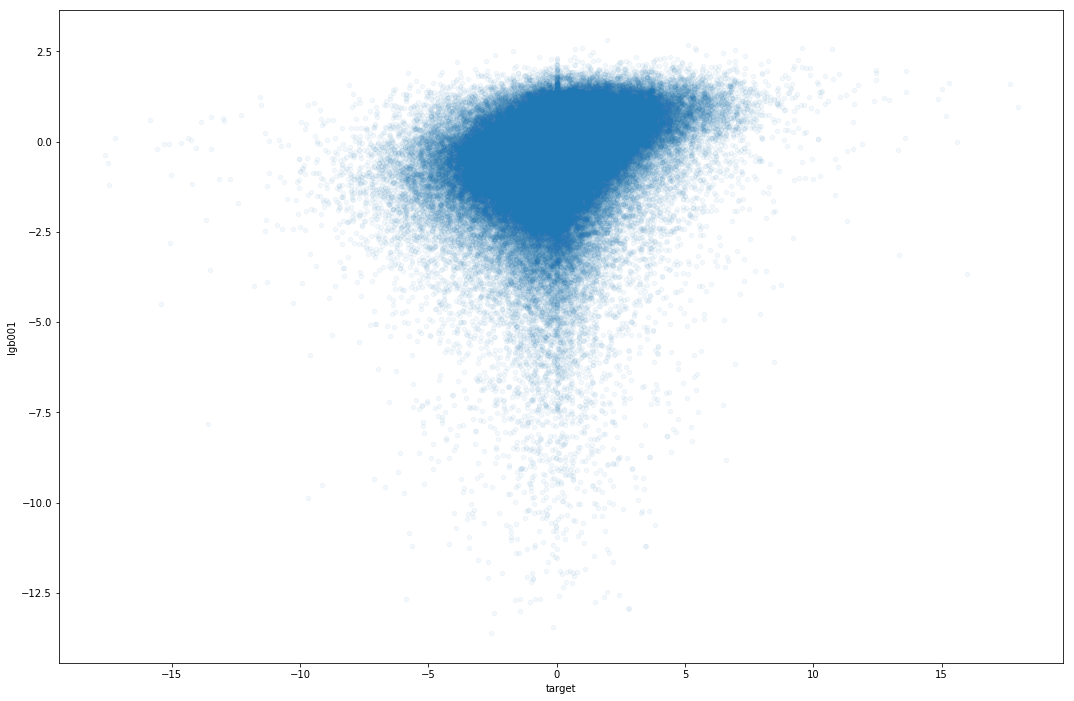

In [46]:
lgb001_oof[lgb001_oof.target > -30].plot(kind="scatter", x="target", y="lgb001", figsize=(18, 12), alpha=.05)

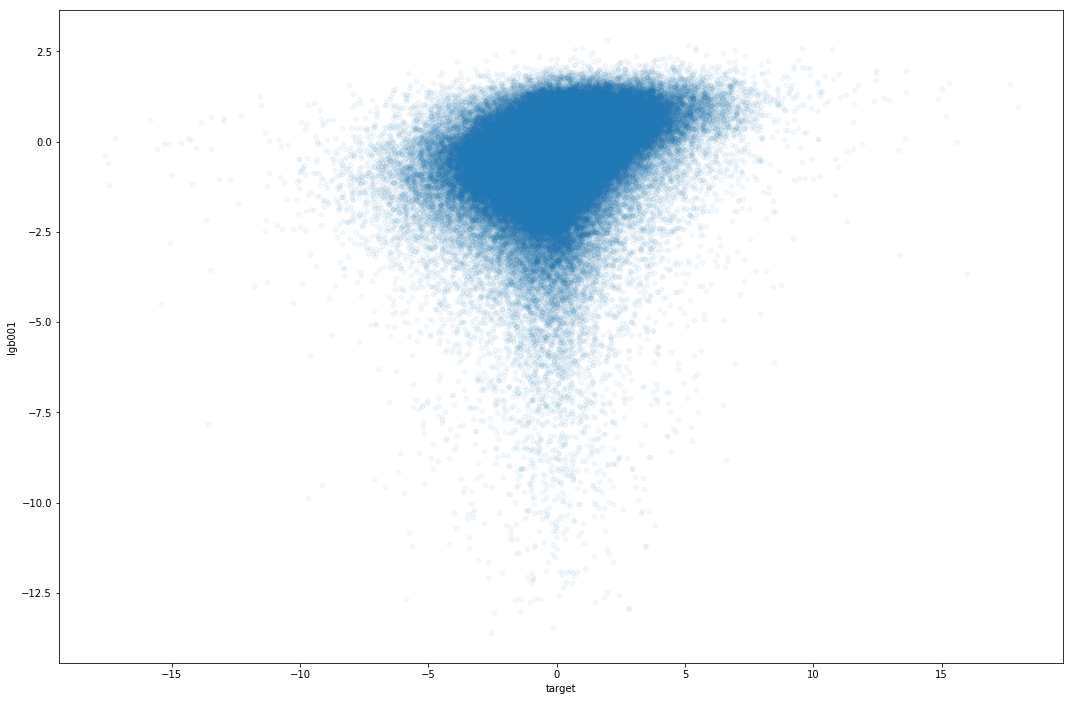

In [47]:
lgb001_oof[(lgb001_oof.target > -30) & (lgb001_oof.target != 0)].plot(kind="scatter", x="target", y="lgb001", figsize=(18, 12), alpha=.05)

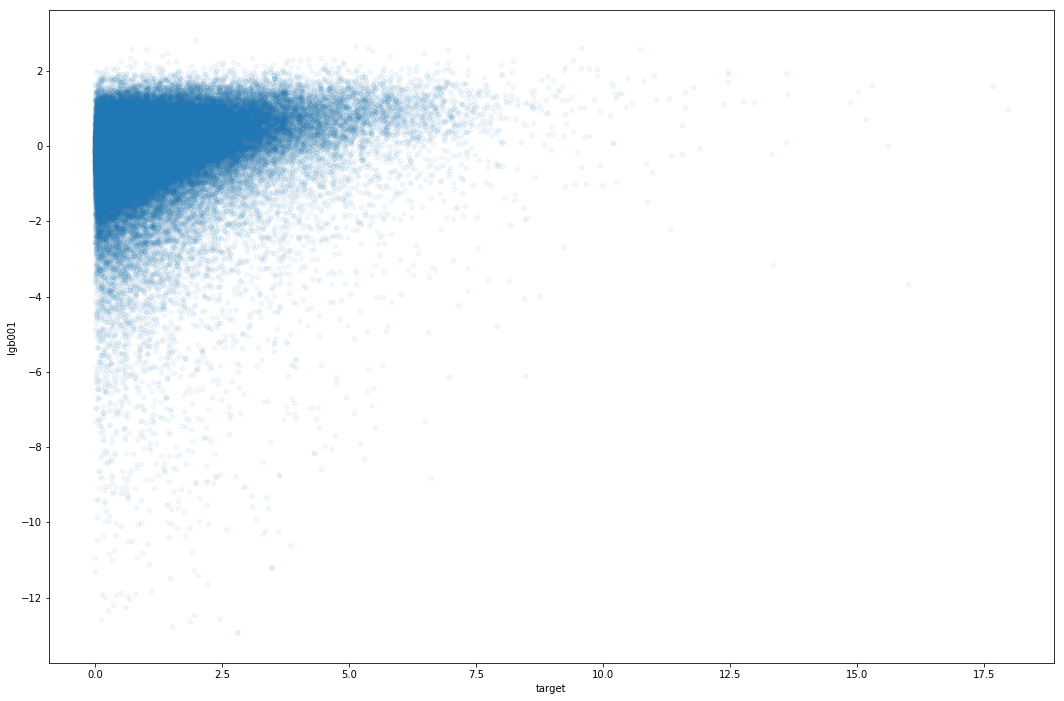

In [48]:
lgb001_oof[(lgb001_oof.target > 0)].plot(kind="scatter", x="target", y="lgb001", figsize=(18, 12), alpha=.05)

# no outlier prediction

In [69]:
nooutlier003_oof = load_oof("no-outlier-003")

In [70]:
nooutlier003_oof.head()

,no-outlier-003,target,card_id
0,-0.379520,-0.820283,C_ID_92a2005557
1,0.080813,0.392913,C_ID_3d0044924f
2,0.634452,0.688056,C_ID_d639edf6cd
3,0.392557,0.142495,C_ID_186d6a6901
4,-0.075506,-0.159749,C_ID_cdbd2c0db2


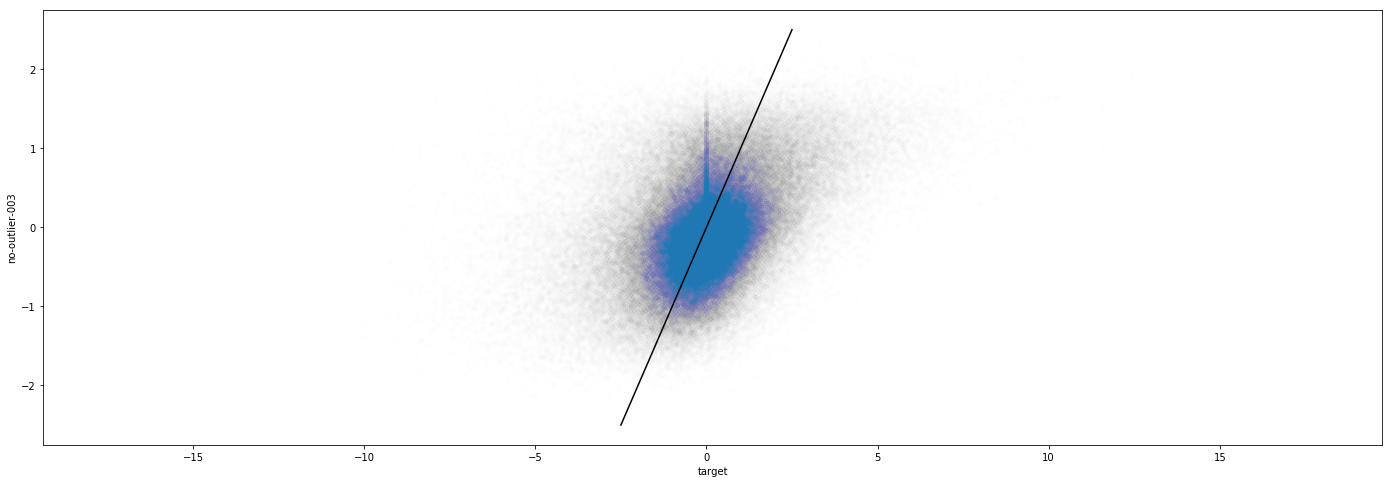

In [71]:
nooutlier003_oof.plot(kind="scatter", x="target", y="no-outlier-003", figsize=(24, 8), alpha=.002)
plt.plot((-2.5, 2.5), (-2.5, 2.5), c="black")

In [72]:
nooutlier004_oof = load_oof("no-outlier-004")

In [73]:
nooutlier004_oof.head()

,no-outlier-004,target,card_id
0,-0.402881,-0.820283,C_ID_92a2005557
1,0.105297,0.392913,C_ID_3d0044924f
2,0.798762,0.688056,C_ID_d639edf6cd
3,0.427165,0.142495,C_ID_186d6a6901
4,-0.078667,-0.159749,C_ID_cdbd2c0db2


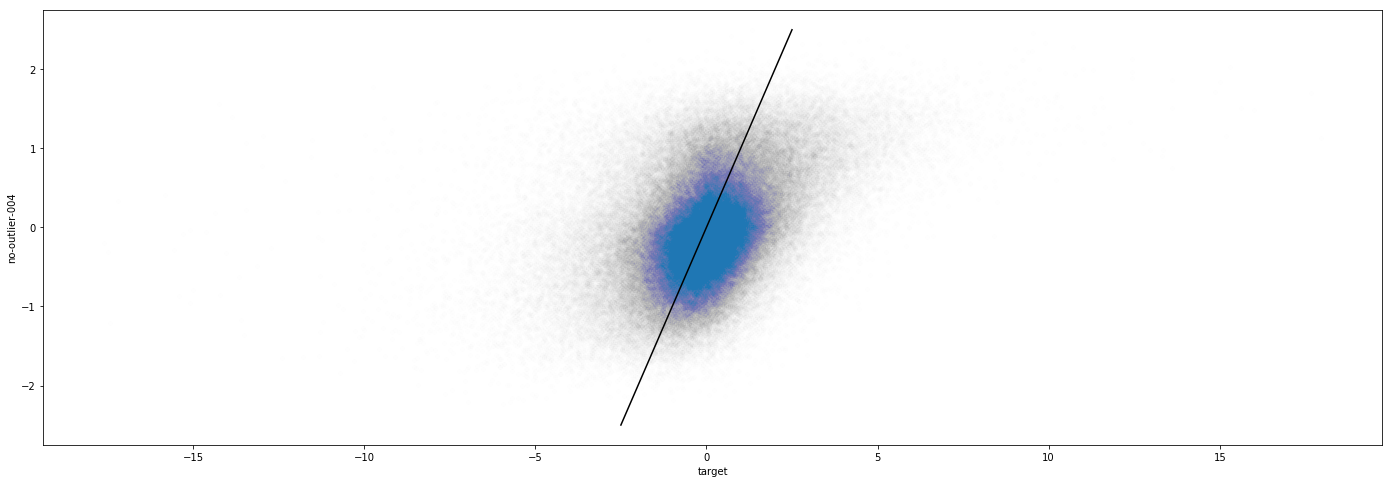

In [75]:
nooutlier004_oof.plot(kind="scatter", x="target", y="no-outlier-004", figsize=(24, 8), alpha=.002)
plt.plot((-2.5, 2.5), (-2.5, 2.5), c="black")

# outlier detection

In [18]:
outlier002_oof = load_oof("outlier002")

In [19]:
outlier002_oof.head()

,outlier002,target,card_id
0,0.003778,0.0,C_ID_92a2005557
1,0.266624,0.0,C_ID_3d0044924f
2,0.119234,0.0,C_ID_d639edf6cd
3,0.017272,0.0,C_ID_186d6a6901
4,0.001915,0.0,C_ID_cdbd2c0db2


In [28]:
precision_recall_dataframe = calc_precision_recall_dataframe(outlier002_oof.target, outlier002_oof.outlier002)

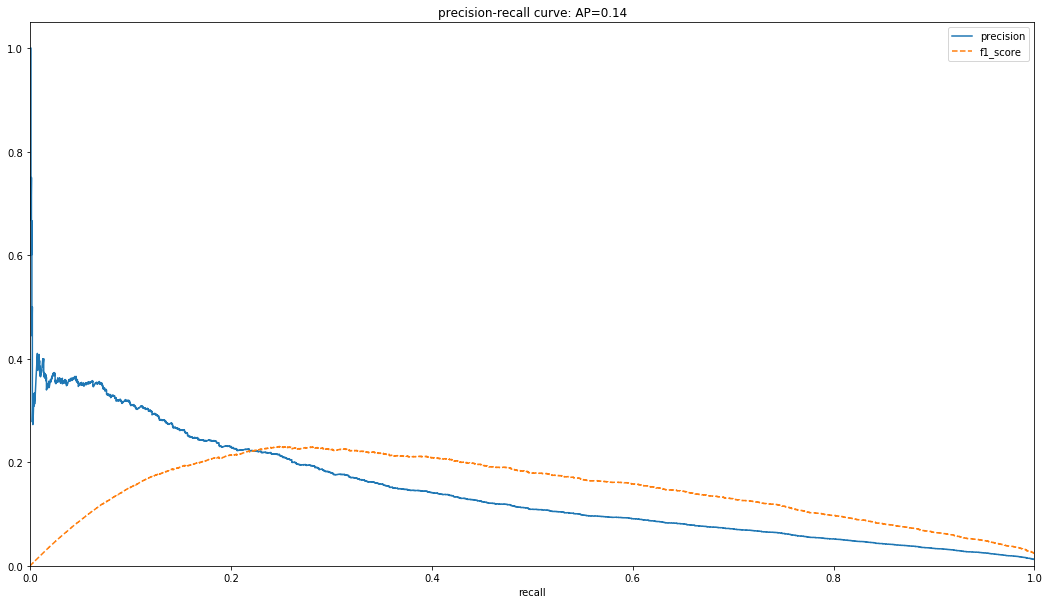

In [31]:
plot_f1(precision_recall_dataframe.recall,
        precision_recall_dataframe.precision,
        precision_recall_dataframe.f1_score,
        average_precision_score(outlier002_oof.target, outlier002_oof.outlier002))

In [35]:
def find_precision_at_recall(prt_data, target_recall=0.6, precision=2e-4):
    sample = prt_data.loc[(prt_data.recall - target_recall).abs() < precision]
    return (float(sample.precision.mean()),
            float(1 - np.mean(sample.index) / prt_data.shape[0]),
            float(sample.thresholds.mean()))

In [34]:
precision_recall_dataframe[(precision_recall_dataframe.recall - 0.1).abs() < 0.01]

,precision,recall,thresholds,f1_score
179632,0.307107,0.109651,0.916422,0.161603
179633,0.306226,0.109198,0.916434,0.160989
179634,0.305344,0.108745,0.916606,0.160374
179635,0.304459,0.108292,0.916628,0.159759
179636,0.304847,0.108292,0.916644,0.159813
179637,0.303959,0.107839,0.916661,0.159197
179638,0.304348,0.107839,0.916705,0.159251
179639,0.303457,0.107386,0.916780,0.158635
179640,0.302564,0.106932,0.916824,0.158018
179641,0.302953,0.106932,0.916848,0.158071


In [86]:
find_precision_at_recall(precision_recall_dataframe, target_recall=0.4, precision=5e-4)

(0.14134621408465195, 0.034585966079148656, 0.765911781269571)

# navie-mix

In [78]:
sub_outlier = pd.read_csv("./data/submissions/outlier002.csv")
sub_nooutlier = pd.read_csv("./data/submissions/no-outlier-003.csv")

In [80]:
sub_nooutlier.head()

,card_id,target
0,C_ID_0ab67a22ab,-0.341364
1,C_ID_130fd0cbdd,-0.249304
2,C_ID_b709037bc5,-0.616946
3,C_ID_d27d835a9f,-0.049850
4,C_ID_2b5e3df5c2,-1.066977


In [79]:
sub_outlier.head()

,card_id,target
0,C_ID_0ab67a22ab,0.829397
1,C_ID_130fd0cbdd,0.041263
2,C_ID_b709037bc5,0.101711
3,C_ID_d27d835a9f,0.002240
4,C_ID_2b5e3df5c2,0.021338


In [84]:
sub_outlier = pd.read_csv("./data/submissions/outlier002.csv")
sub_nooutlier = pd.read_csv("./data/submissions/no-outlier-003.csv")

to_replace = (sub_outlier.target > 0.9)
to_mix = (sub_outlier.target <= 0.9) & (sub_outlier.target > 0.8)


sub_nooutlier.loc[to_replace, "target"] = -33.21928
sub_nooutlier.loc[to_mix, "target"] = (1 - sub_outlier[to_mix].target * 0.5) * sub_nooutlier[to_mix].target + sub_outlier[to_mix].target * 0.5 * -33.21928

sub_nooutlier.to_csv("./data/submissions/notebook004-outliers-mix.csv", index=False)

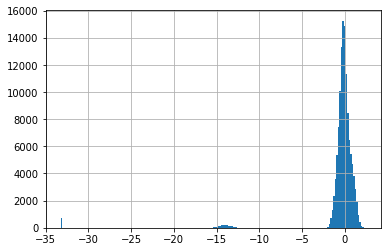

In [85]:
sub_nooutlier.target.hist(bins=200)

In [87]:
sub_outlier = pd.read_csv("./data/submissions/outlier002.csv")
sub_nooutlier = pd.read_csv("./data/submissions/no-outlier-003.csv")

to_replace = (sub_outlier.target > 0.85)
to_mix = (sub_outlier.target <= 0.85) & (sub_outlier.target > 0.75)


sub_nooutlier.loc[to_replace, "target"] = -33.21928
sub_nooutlier.loc[to_mix, "target"] = (1 - sub_outlier[to_mix].target * 0.5) * sub_nooutlier[to_mix].target + sub_outlier[to_mix].target * 0.5 * -33.21928

sub_nooutlier.to_csv("./data/submissions/notebook004-outliers-mix02.csv", index=False)

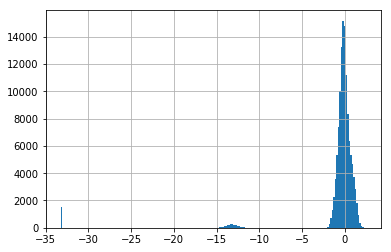

In [88]:
sub_nooutlier.target.hist(bins=200)

In [89]:
sub_outlier = pd.read_csv("./data/submissions/outlier002.csv")
sub_nooutlier = pd.read_csv("./data/submissions/no-outlier-003.csv")

to_replace = (sub_outlier.target > 0.95)
to_mix = (sub_outlier.target <= 0.95) & (sub_outlier.target > 0.9)


sub_nooutlier.loc[to_replace, "target"] = -33.21928
sub_nooutlier.loc[to_mix, "target"] = (1 - sub_outlier[to_mix].target * 0.5) * sub_nooutlier[to_mix].target + sub_outlier[to_mix].target * 0.5 * -33.21928

sub_nooutlier.to_csv("./data/submissions/notebook004-outliers-mix03.csv", index=False)

# mask-mix

In [4]:
pred_with_outlier = pd.read_csv("./data/submissions/lgb001p.csv")
pred_without_outlier = pd.read_csv("./data/submissions/no-outlier-003.csv")
outlier_mask = pd.read_csv("./data/submissions/outlier002.csv")

In [19]:
(outlier_mask.target > 0.78).sum() / outlier_mask.shape[0]

0.025747635957710135

In [24]:
(outlier_mask.target > 0.82).sum()

2196

In [25]:
pred_mix = pred_without_outlier.copy()
maybe = outlier_mask.target > 0.82
pred_mix.loc[maybe, "target"] = pred_with_outlier.loc[maybe, "target"]
pred_mix.to_csv("./data/submissions/notebook004-outliers-mask82.csv", index=False)

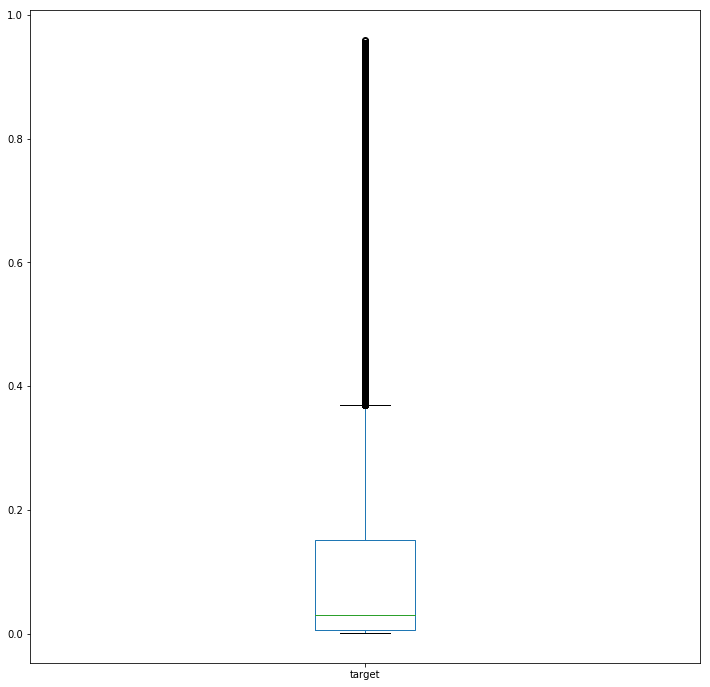

In [13]:
outlier_mask.target.plot(kind="box", figsize=(12, 12))

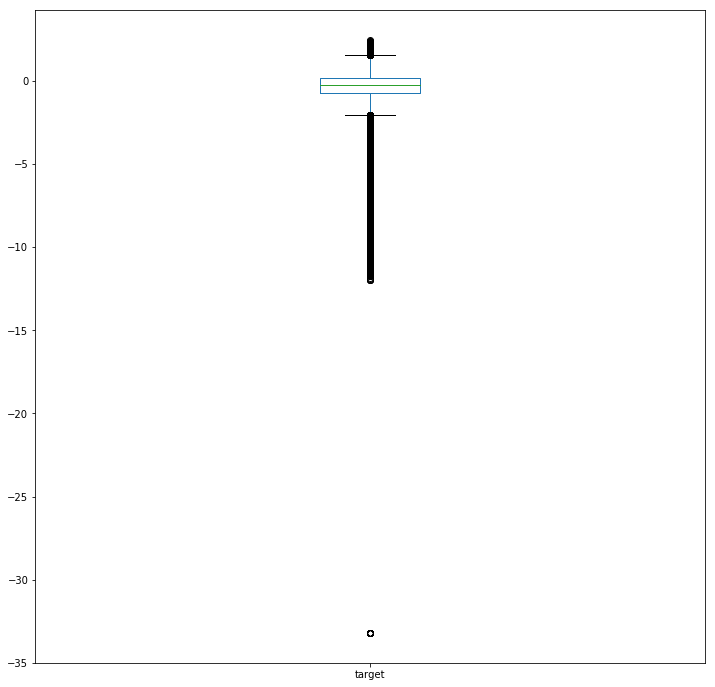

In [9]:
pred_with_outlier.target.plot(kind="box", figsize=(12, 12))

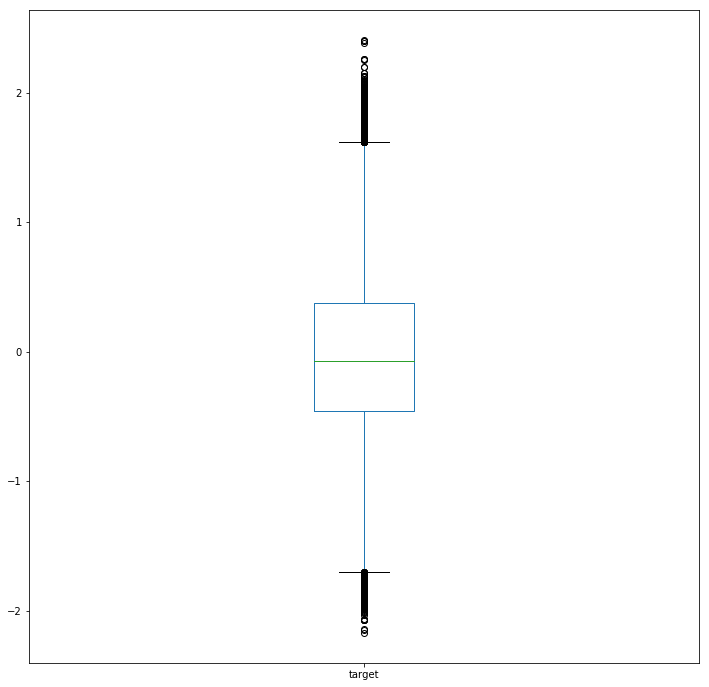

In [11]:
pred_without_outlier.target.plot(kind="box", figsize=(12, 12))